# Day 1 – Load and Check Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/raw/insurance.csv")


In [3]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape


(1338, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Day 2 - Data Loading & Initial Inspection

This notebook loads the raw insurance dataset and performs basic structural checks.
No cleaning or transformations are applied at this stage.


# Day 3 – Exploratory Understanding of the Data

The purpose of this section is to understand the distribution and behaviour of the variables,
particularly healthcare costs, before any cleaning or modelling is performed.


In [6]:
df['charges'].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

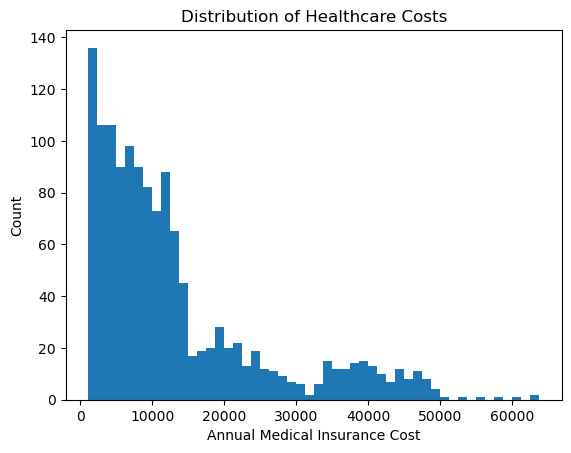

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['charges'], bins=50)
plt.xlabel("Annual Medical Insurance Cost")
plt.ylabel("Count")
plt.title("Distribution of Healthcare Costs")
plt.show()


### Initial Observation: Cost Distribution

Healthcare costs are highly right-skewed, with a small proportion of individuals
accounting for very high annual costs. This pattern is consistent with real-world
healthcare expenditure, where a minority of patients drive a majority of costs.


### Interpretation of Healthcare Cost Summary Statistics

The summary statistics of the target variable (`charges`) highlight a highly uneven
distribution of healthcare costs across individuals.

The mean annual cost (≈ 13,270) is substantially higher than the median cost
(≈ 9,382), indicating a strongly right-skewed distribution. This suggests that
while most individuals incur relatively moderate healthcare costs, a small subset
of high-risk individuals accounts for disproportionately high expenditure.

The wide standard deviation (≈ 12,110), which is comparable in magnitude to the mean,
further reinforces the presence of large variability in healthcare spending. This
pattern is consistent with real-world healthcare systems, where costs are driven by
a minority of individuals with chronic conditions, complex care needs, or repeated
healthcare utilisation.

Lower quartile values indicate that 25% of individuals incur annual costs below
≈ 4,740, representing a low-risk population with minimal healthcare utilisation.
In contrast, the upper quartile (above ≈ 16,640) reflects individuals with elevated
healthcare needs and potentially reduced functional independence.

From a wellness and occupational therapy perspective, individuals in the upper tail
of the cost distribution are likely to experience greater functional limitations,
higher rehabilitation needs, and increased demand for long-term support. This
reinforces the importance of early intervention and preventive strategies aimed at
reducing long-term healthcare costs while improving quality of life.

These observations motivate the use of risk-based and relative cost modelling
approaches in later stages of the project, rather than relying solely on absolute
cost values.


### Occupational Therapy Perspective on Cost Distribution

The strong right-skew in healthcare costs suggests that a small proportion of individuals
experience disproportionately high healthcare utilisation. From an occupational therapy
perspective, this high-cost group is likely to include individuals with reduced functional
independence, difficulty performing activities of daily living (ADLs), and increased need
for rehabilitation, assistive devices, or long-term support.

These findings align with the OT focus on identifying individuals at risk of functional
decline early, where preventative or rehabilitative interventions may reduce long-term
healthcare expenditure while improving participation and quality of life.


In [8]:
df.groupby('smoker')['charges'].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


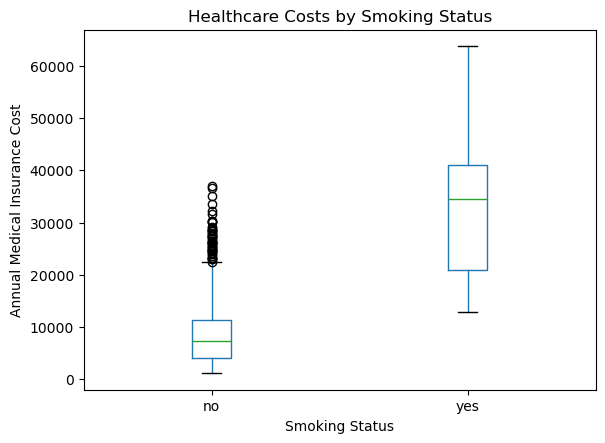

In [9]:
import matplotlib.pyplot as plt

df.boxplot(column='charges', by='smoker', grid=False)
plt.title("Healthcare Costs by Smoking Status")
plt.suptitle("")  # removes automatic title
plt.xlabel("Smoking Status")
plt.ylabel("Annual Medical Insurance Cost")
plt.show()


### Smoking Status and Healthcare Costs

Smoking status shows a pronounced association with healthcare expenditure.
Individuals who smoke exhibit substantially higher median and upper-tail costs
compared to non-smokers. The typical smoker costs more per year than the typical non-smoker. This indicates that even before extreme illness, smokers tend to require more healthcare which suggests a higher baseline risk. Smokers may also have many more very high-cost cases. Therefore smokers are more likely to become extremely expensive patients. This reflects chronic disease, complications, longer recovery times and higher rehab needs. Non-smokers generally cost less overall. Their costs are more predictable with fewer extreme cases. Non-smokers are more stable, predictable and have lower risk. 

### OT Interpretation of Smoking as a Cost Driver

Smoking status appears to be a strong differentiator of healthcare costs, particularly in
the upper tail of the distribution. From an occupational therapy perspective, smoking may
serve as a proxy for long-term health behaviours that impact functional endurance,
cardiorespiratory capacity, and ability to engage in meaningful daily occupations.

Higher healthcare costs among smokers may reflect increased rehabilitation needs,
longer recovery times, and reduced functional resilience following illness or injury.
This highlights the role of preventative, behaviour-focused interventions in reducing
future functional decline and associated healthcare costs.


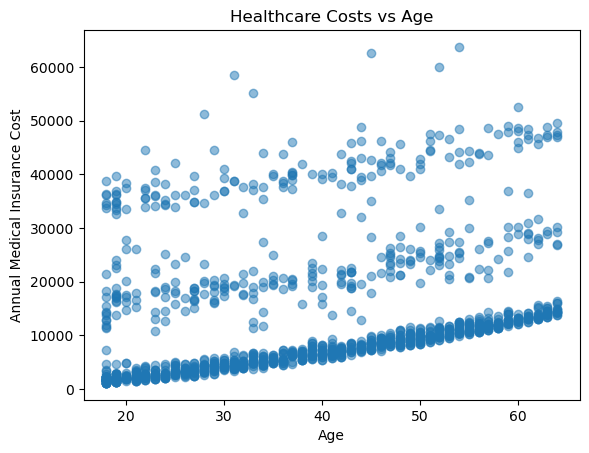

In [10]:
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Annual Medical Insurance Cost")
plt.title("Healthcare Costs vs Age")
plt.show()


### Age and Healthcare Costs

Healthcare costs generally increase with age; however, the relationship is highly
variable and not strictly linear. While older individuals tend to incur higher costs
on average, substantial variation exists within all age groups.

This variability suggests that age alone is insufficient to explain healthcare
expenditure and likely interacts with other factors such as lifestyle behaviours,
chronic conditions, and functional status.


### Functional Aging and Healthcare Costs

While healthcare costs generally increase with age, the wide variability observed across
all age groups suggests that chronological age alone does not determine healthcare needs.
From an occupational therapy perspective, functional age — including mobility, cognitive
capacity, and ability to perform daily tasks — may be a more meaningful determinant of
healthcare utilisation than age itself.

This reinforces the importance of functional assessments and early intervention strategies
that support independence and participation across the lifespan.


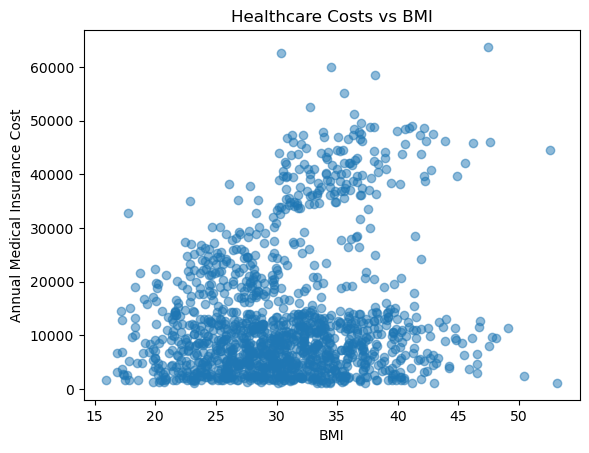

In [11]:
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("Annual Medical Insurance Cost")
plt.title("Healthcare Costs vs BMI")
plt.show()


### BMI and Healthcare Costs

BMI shows a weak to moderate association with healthcare costs, with higher BMI values
corresponding to increased variability and a greater presence of high-cost outliers.
This suggests that BMI may act as a proxy for underlying health risks and functional
strain rather than serving as a direct determinant of healthcare expenditure.


### BMI as a Proxy for Functional Strain

The relationship between BMI and healthcare costs suggests increased variability and higher
cost outliers at elevated BMI levels. From an occupational therapy perspective, higher BMI
may contribute to reduced mobility, increased joint strain, fatigue, and difficulty
performing activities of daily living.

These functional challenges may increase reliance on healthcare services, rehabilitation,
and assistive strategies, emphasizing the value of holistic wellness interventions aimed
at maintaining functional capacity.


In [12]:
df['smoker'].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [14]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Summary: OT-Informed Interpretation

Overall, the exploratory analysis suggests that healthcare costs are closely linked to
functional risk, lifestyle behaviours, and cumulative health burden rather than isolated
medical factors. An occupational therapy perspective emphasizes the importance of early,
function-focused interventions to mitigate long-term healthcare costs and support sustained
participation and independence.


## Early Hypotheses (Pre-Modelling)

Based on the exploratory patterns observed above, the following hypotheses are proposed:

- Smoking status is likely to be a strong predictor of high healthcare costs, reflecting increased long-term health burden and reduced functional resilience.

- Age may have a nonlinear relationship with healthcare expenditure, as chronological age alone does not fully capture functional capacity or independence.

- BMI may act as a proxy for functional strain, mobility limitations, and chronic disease risk, rather than serving as a direct determinant of healthcare cost.

- Healthcare costs are driven by a small subset of high-risk individuals who may experience reduced ability to perform activities of daily living (ADLs) and increased need for rehabilitation or long-term support.

From an occupational therapy perspective, these hypotheses suggest that healthcare expenditure is closely linked to functional status and participation in daily life, highlighting the potential value of early, function-focused interventions in reducing long-term costs.

These hypotheses will be explored in later stages of the project.



# Day 4 — Feature Understanding & OT-Informed Clinical Framing
**Objective:** Interpret each variable clinically (OT lens) and reframe healthcare cost as a downstream functional outcome rather than “just money”.


## Feature Overview and Clinical Interpretation
This section examines each predictor variable from both a data-driven and Occupational Therapy (OT) perspective, emphasising function, participation, and cumulative health burden rather than isolated medical conditions.


| Feature | Data Meaning | Relationship to Healthcare Cost | OT / Functional Interpretation |
|-------|--------------|----------------------------------|--------------------------------|
| age | Chronological age | Higher age often associates with increased utilisation | Age may reflect declining functional reserve and ADL/IADL independence |
| bmi | Body mass index | Proxy for metabolic and musculoskeletal strain | Elevated BMI can limit mobility, endurance, and work participation |
| smoker | Smoking status (binary) | Strongly linked to chronic disease and complications | Impacts functional capacity, respiratory endurance, and recovery |
| children | Number of dependents | May reflect stress and healthcare-seeking behaviour | Caregiving roles can create occupational imbalance and fatigue |
| region | Geographic location | Reflects access, pricing, and utilisation differences | Environmental context influences participation and access to care |
| sex | Biological sex | Different disease prevalence and utilisation patterns | Social roles and expectations may affect participation and health behaviour |


### Age
Chronological age captures cumulative exposure to health risk. From an OT perspective, age is often associated with reduced functional reserve, increasing the likelihood of support needs for mobility, self-care, and participation in daily activities.

### BMI
BMI serves as a proxy for both metabolic risk and physical strain. Elevated BMI may limit endurance, joint health, and occupational participation, contributing indirectly to higher healthcare utilisation.

### Smoking Status
Smoking represents a high-impact lifestyle risk factor. OT-relevant consequences include reduced functional capacity, breath control, and delayed recovery, increasing long-term intervention needs.

### Children
The number of dependents reflects caregiving demands. Sustained caregiving can lead to occupational imbalance, fatigue, and delayed self-care, which may influence long-term health outcomes.

### Region
Geographic region captures environmental and systemic factors such as access to care and preventative services. OT frameworks emphasise environment as a determinant of participation and health equity.

### Sex
Sex may reflect both biological and social influences on health. Occupational roles and societal expectations can shape health behaviours, care access, and participation patterns.


## Healthcare Charges as a Downstream Functional Outcome
Rather than representing isolated medical events, healthcare charges are interpreted as downstream indicators of functional burden, chronic disease management, and participation restriction. High healthcare costs are therefore not typically driven by a single illness, but by a gradual reduction in an individual’s ability to function independently in daily life.

High-cost individuals often experience compounded functional challenges that require repeated healthcare engagement, rehabilitation, or long-term support. From an Occupational Therapy perspective, these costs usually reflect ongoing difficulties such as reduced mobility, chronic condition management, and increased support needs. Early identification of functional decline creates an opportunity for preventative, function-focused intervention that may help maintain independence and reduce long-term healthcare expenditure.




## Linking Clinical Insight to Early Hypotheses and Modelling Strategy
The OT-informed clinical interpretations developed above directly inform the pre-modelling hypotheses previously outlined. Variables such as age, BMI, and smoking status are viewed not as isolated predictors, but as indicators of functional vulnerability and reduced occupational participation.

These variables may interact and exhibit non-linear relationships with healthcare costs, reflecting the cumulative and functional nature of health risk rather than single-factor effects. Accordingly, these insights guide the subsequent correlation analysis and modelling decisions in later stages of the project.


# Day 5 — Correlation Analysis & Early Statistical Validation
**Objective:** Quantify relationships between predictors and healthcare charges, and statistically validate the clinically informed hypotheses developed in earlier stages.


## Distribution Shape and Skewness of Healthcare Charges
Before correlation analysis, the distribution of the target variable is examined to assess skewness and the presence of extreme values.


In [15]:
df['charges'].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [16]:
df['charges'].skew()


np.float64(1.5158796580240388)

In [17]:
df['log_charges'] = np.log(df['charges'])


In [18]:
df['log_charges'].skew()


np.float64(-0.09009752473024582)

**Interpretation**

The distribution of healthcare charges is strongly right-skewed, indicating that a small number of individuals account for disproportionately high healthcare costs. This pattern is consistent with healthcare expenditure data, where high-cost cases often reflect cumulative functional decline and chronic condition management.

Applying a logarithmic transformation substantially reduces skewness and produces a more symmetric distribution. This transformation improves the suitability of the data for subsequent statistical analysis and modelling, while preserving the underlying cost structure.


## Pearson Correlation Analysis
Pearson correlation is used to assess linear relationships between numerical predictors and healthcare charges.


In [19]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
df[numeric_cols].corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Interpretation**

Pearson correlation analysis reveals weak to moderate linear relationships between individual numerical predictors and healthcare charges. Age shows the strongest linear association with charges, followed by BMI, while the number of children exhibits minimal linear relationship.

These findings suggest that healthcare costs are not strongly explained by any single variable in isolation. Instead, costs likely reflect cumulative and interacting factors, supporting the OT-informed perspective that functional decline and health risk are multifactorial rather than driven by simple linear effects.


## Spearman Correlation Analysis
Spearman correlation is used to assess monotonic relationships and is more robust to skewed distributions and non-linear patterns.


In [20]:
df[numeric_cols].corr(method='spearman')


,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


**Interpretation**

Spearman correlation reveals stronger monotonic relationships between predictors and healthcare charges than those observed using Pearson correlation. Age demonstrates a moderate to strong association with healthcare costs, indicating that costs consistently increase with age even when the relationship is not strictly linear.

BMI and number of children show weaker monotonic associations, suggesting that their influence on healthcare expenditure may be indirect or dependent on interaction with other factors. Overall, these findings support the OT-informed perspective that healthcare costs reflect cumulative and non-linear functional decline rather than simple linear effects.


## Healthcare Charges by Smoking Status
Smoking status is examined as a high-impact categorical risk factor.


In [21]:
df.groupby('smoker')['charges'].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


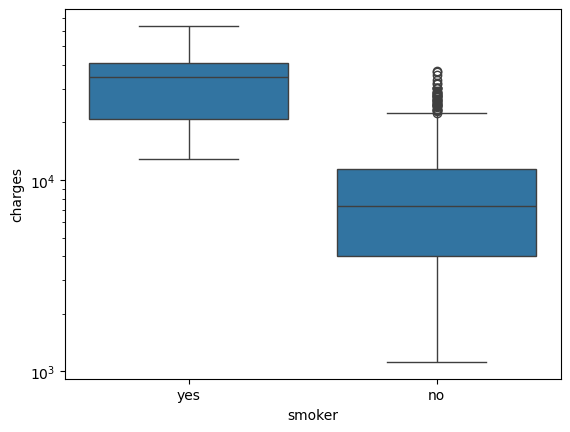

In [22]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.yscale('log')


## Overall Interpretation of Findings

The analyses conducted in this section demonstrate that healthcare charges exhibit substantial right skewness, with a small subset of individuals accounting for disproportionately high costs. Log transformation of the target variable effectively reduces skewness and improves suitability for subsequent statistical analysis, without altering the underlying cost structure.

Correlation analyses reveal that healthcare expenditure is not strongly driven by any single numerical predictor in isolation. Pearson correlations indicate weak linear relationships between age, BMI, number of children, and healthcare charges, suggesting that simple linear effects are insufficient to explain cost variation. In contrast, Spearman correlation identifies a stronger monotonic relationship between age and healthcare costs, indicating that expenditure tends to increase consistently with age in a non-linear manner.

Group-based analysis of smoking status highlights smoking as the most influential individual risk factor in the dataset. Smokers exhibit substantially higher median and upper-range healthcare costs compared to non-smokers and dominate the high-cost tail of the distribution. While a small number of high-cost non-smokers are present, these cases likely reflect alternative sources of functional decline or severe health events unrelated to smoking.

From an Occupational Therapy perspective, these results suggest that high healthcare costs usually develop over time as people struggle more with everyday functioning, rather than being caused by a single medical event. Costs often reflect ongoing challenges such as reduced independence, managing long-term conditions, and difficulty participating fully in daily life. These insights help guide how the data will be prepared and modelled in the next stage of the project.


## Day 6: Feature Relationships & Interaction Analysis


In [23]:
df.head()
df.columns
df.shape


(1338, 8)

In [24]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_charges'],
      dtype='object')

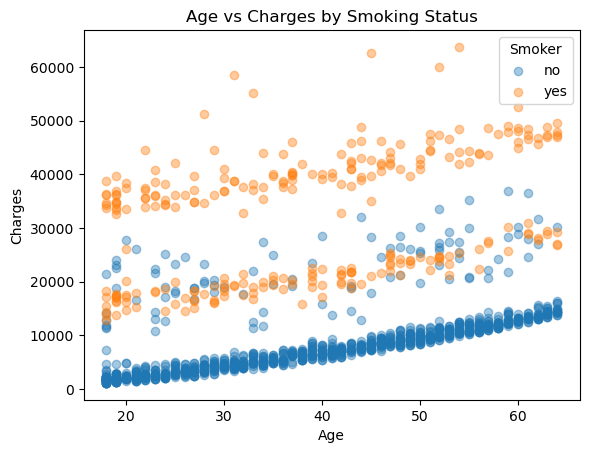

In [25]:
plt.figure()
for status, group in df.groupby("smoker"):
    plt.scatter(group["age"], group["charges"], alpha=0.4, label=status)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges by Smoking Status")
plt.legend(title="Smoker")
plt.show()


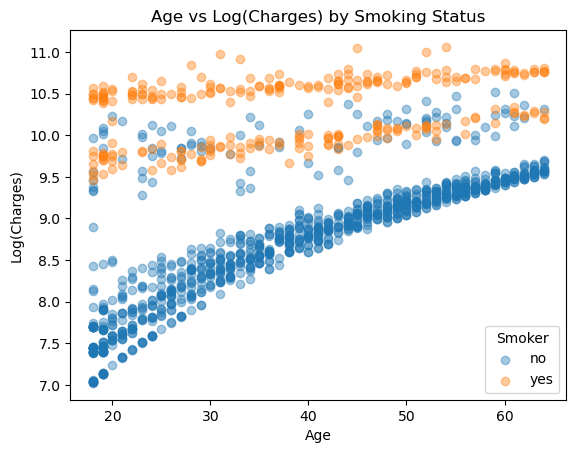

In [26]:
plt.figure()
for status, group in df.groupby("smoker"):
    plt.scatter(group["age"], group["log_charges"], alpha=0.4, label=status)

plt.xlabel("Age")
plt.ylabel("Log(Charges)")
plt.title("Age vs Log(Charges) by Smoking Status")
plt.legend(title="Smoker")
plt.show()


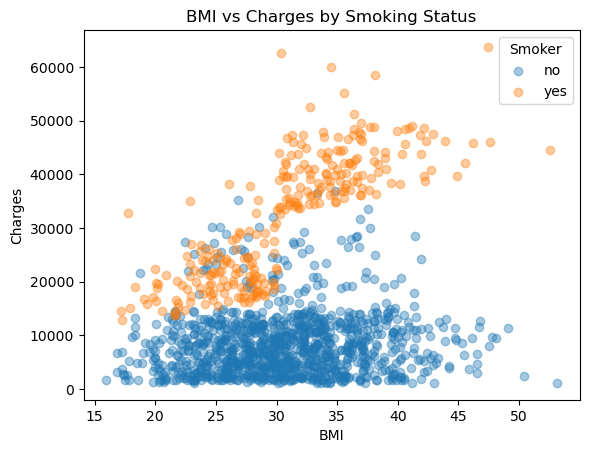

In [27]:
plt.figure()
for status, group in df.groupby("smoker"):
    plt.scatter(group["bmi"], group["charges"], alpha=0.4, label=status)

plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges by Smoking Status")
plt.legend(title="Smoker")
plt.show()


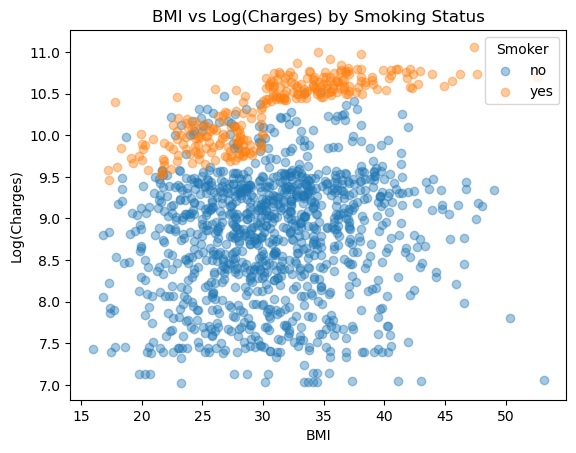

In [28]:
plt.figure()
for status, group in df.groupby("smoker"):
    plt.scatter(group["bmi"], group["log_charges"], alpha=0.4, label=status)

plt.xlabel("BMI")
plt.ylabel("Log(Charges)")
plt.title("BMI vs Log(Charges) by Smoking Status")
plt.legend(title="Smoker")
plt.show()


In [29]:
df["bmi_group"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"],
    include_lowest=True
)

df["bmi_group"].value_counts()


bmi_group
Obese          705
Overweight     386
Normal         226
Underweight     21
Name: count, dtype: int64

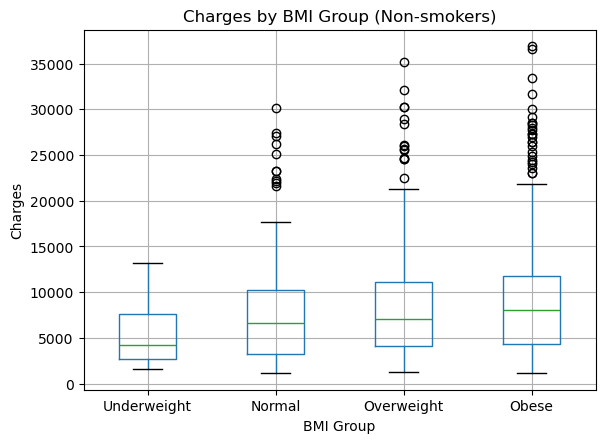

In [30]:
df[df["smoker"] == "no"].boxplot(column="charges", by="bmi_group")
plt.title("Charges by BMI Group (Non-smokers)")
plt.suptitle("")
plt.xlabel("BMI Group")
plt.ylabel("Charges")
plt.show()


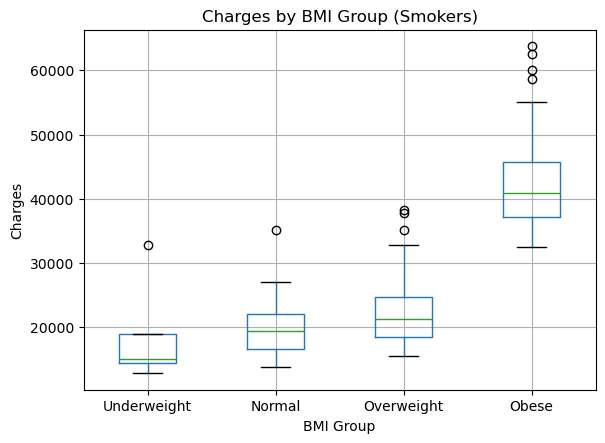

In [31]:
df[df["smoker"] == "yes"].boxplot(column="charges", by="bmi_group")
plt.title("Charges by BMI Group (Smokers)")
plt.suptitle("")
plt.xlabel("BMI Group")
plt.ylabel("Charges")
plt.show()


In [32]:
threshold = df["charges"].quantile(0.90)
df["high_cost"] = (df["charges"] >= threshold).astype(int)

threshold


np.float64(34831.7197)

In [33]:
pd.crosstab(df["smoker"], df["high_cost"], normalize="columns")


high_cost,0,1
smoker,,
no,0.881229,0.022388
yes,0.118771,0.977612


In [34]:
df.groupby("high_cost")[["age", "bmi", "charges"]].describe()


age                                                         bmi  \
            count       mean        std   min   25%   50%   75%   max   count   
high_cost                                                                       
0          1204.0  38.920266  14.083067  18.0  26.0  39.0  51.0  64.0  1204.0   
1           134.0  41.783582  13.528784  18.0  31.0  43.0  53.0  64.0   134.0   

                      ...                charges                             \
                mean  ...     75%    max   count          mean          std   
high_cost             ...                                                     
0          30.108131  ...  33.835  53.13  1204.0  10030.798217  7400.326935   
1          35.652500  ...  37.775  52.58   134.0  42378.686097  5497.057318   

                                                                              
                  min           25%           50%           75%          max  
high_cost                                                                     
0           1121.8739   4425.455588   8435.368150  12990.208188  34828.65400  
1          34838.8730  38298.203625  41379.381875  46050.934500  63770.42801  

[2 rows x 24 columns]

In [35]:
df["smoker_num"] = df["smoker"].map({"no": 0, "yes": 1})

df[["age", "bmi", "children", "smoker_num", "log_charges"]].corr()


,age,bmi,children,smoker_num,log_charges
age,1.000000,0.109272,0.042469,-0.025019,0.527834
bmi,0.109272,1.000000,0.012759,0.003750,0.132669
children,0.042469,0.012759,1.000000,0.007673,0.161336
smoker_num,-0.025019,0.003750,0.007673,1.000000,0.665506
log_charges,0.527834,0.132669,0.161336,0.665506,1.000000


## Interpretation (with Occupational Therapy Perspective)

Feature relationship and interaction analysis indicates that healthcare costs are driven by compounding risk factors rather than isolated variables. Smoking status shows the strongest association with healthcare expenditure and consistently amplifies the effects of both age and BMI. While healthcare costs increase gradually with age among non-smokers, smokers exhibit substantially higher and more variable cost trajectories across the lifespan. Additionally, BMI does not demonstrate a strong linear relationship with costs overall. However, individuals at higher BMI levels, particularly obese smokers, experience markedly elevated healthcare charges.

From an Occupational Therapy perspective, these patterns suggest that healthcare costs function as downstream indicators of cumulative functional burden rather than single medical events. Age, smoking, and elevated BMI are likely proxies for progressive declines in physical capacity, endurance, and participation in daily occupations,  with smoking accelerating functional deterioration over time. The concentration of healthcare expenditure within a small high-cost subgroup which disproportionately composes of older individuals, smokers, and those with higher BMI, highlights the role of sustained functional impairment and chronic condition management in driving healthcare utilisation. Collectively, these findings support a risk-stratified view of healthcare costs and underscore the potential value of early, function-focused and preventive interventions in reducing long-term healthcare expenditure.

## Day 7: Feature Relationships & Interaction Insights

In [36]:
df.head()
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          1338 non-null   int64   
 1   sex          1338 non-null   object  
 2   bmi          1338 non-null   float64 
 3   children     1338 non-null   int64   
 4   smoker       1338 non-null   object  
 5   region       1338 non-null   object  
 6   charges      1338 non-null   float64 
 7   log_charges  1338 non-null   float64 
 8   bmi_group    1338 non-null   category
 9   high_cost    1338 non-null   int64   
 10  smoker_num   1338 non-null   int64   
dtypes: category(1), float64(3), int64(4), object(3)
memory usage: 106.2+ KB


In [37]:
num_cols = ["age", "bmi", "children", "charges", "log_charges"]
corr = df[num_cols].corr()
corr


,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


**Correlation summary**

- Age shows a moderate positive correlation with healthcare charges.
- BMI shows a weaker but positive association with charges.
- Number of children has minimal correlation with healthcare costs.
- Log-transformed charges reduce skew and produce more stable correlations.


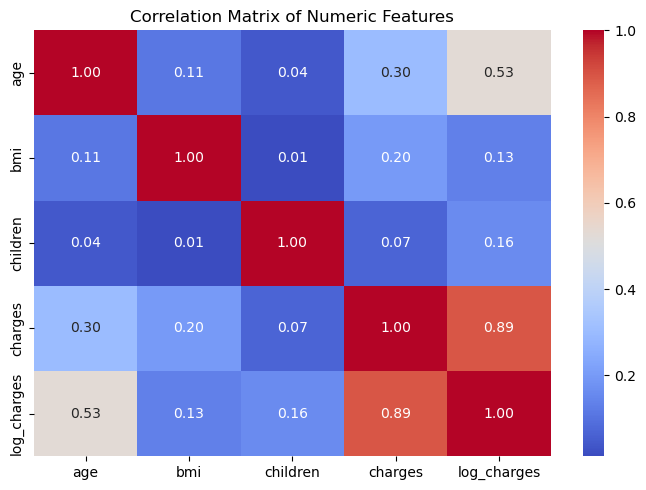

In [38]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


Correlation measures linear relationships only and does not capture interaction effects, which are explored next.


In [39]:
df["smoker_label"] = df["smoker"].map({"yes": "Smoker", "no": "Non-smoker"})


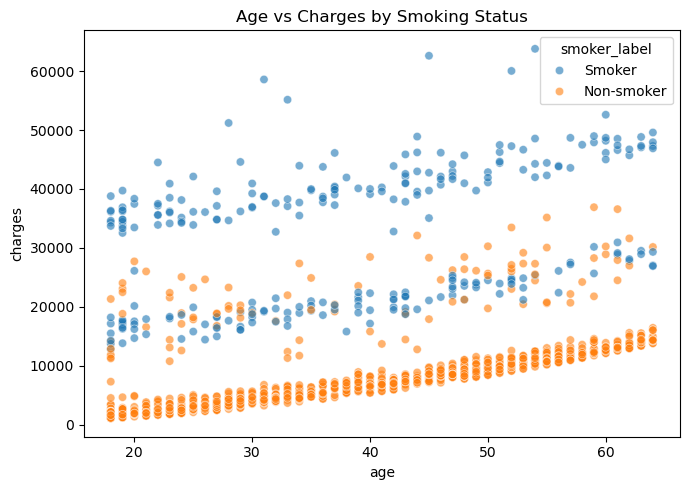

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="age", y="charges", hue="smoker_label", alpha=0.6)
plt.title("Age vs Charges by Smoking Status")
plt.tight_layout()
plt.show()


Among non-smokers, healthcare costs increase gradually with age.  
Among smokers, costs increase much more steeply, with a wider spread at older ages.  
This suggests smoking amplifies the effect of ageing on healthcare expenditure.


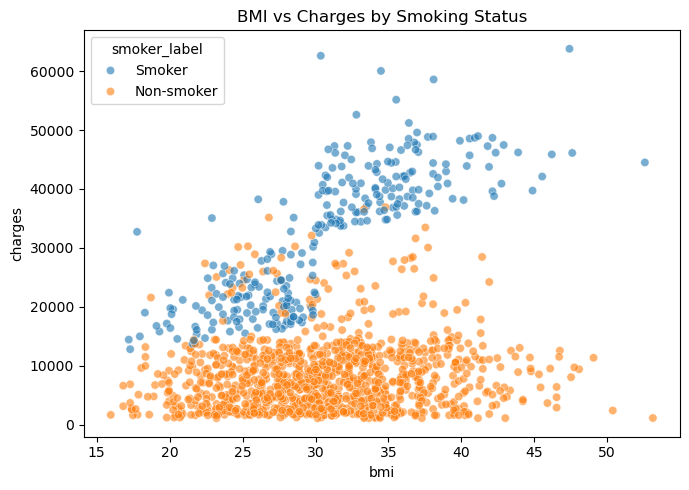

In [41]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker_label", alpha=0.6)
plt.title("BMI vs Charges by Smoking Status")
plt.tight_layout()
plt.show()


BMI alone shows a weak relationship with charges.  
However, within smokers, higher BMI is associated with substantially higher healthcare costs, indicating an interaction effect.


In [42]:
df["age_band"] = pd.cut(
    df["age"],
    bins=[17, 29, 39, 49, 59, 69],
    labels=["18–29", "30–39", "40–49", "50–59", "60–69"]
)


In [43]:
df.groupby(
    ["smoker_label", "age_band"],
    observed=True
)["charges"].median().unstack()



age_band,18–29,30–39,40–49,50–59,60–69
smoker_label,,,,,
Non-smoker,2709.111900,5400.98050,8240.58960,11364.61760,13831.1152
Smoker,33604.251925,34112.91315,36449.54936,42303.69215,46599.1084



Median healthcare charges increase with age in both smokers and non-smokers.  
However, smokers exhibit substantially higher costs at every age band, with median charges already elevated in early adulthood.  

This indicates that smoking acts as a strong effect modifier, accelerating healthcare expenditure independently of age.  
The widening gap across age bands suggests cumulative functional and physiological burden rather than isolated health events.



In [44]:
pd.crosstab(df["high_cost"], df["smoker_label"], normalize="index")


smoker_label,Non-smoker,Smoker
high_cost,,
0,0.881229,0.118771
1,0.022388,0.977612


In [45]:
df.groupby("high_cost")[["age", "bmi", "charges"]].median()


,age,bmi,charges
high_cost,,,
0,39.0,29.8,8435.368150
1,43.0,35.3,41379.381875




The high_cost group is overwhelmingly composed of smokers, with nearly 98% of high-cost individuals reporting smoking behaviour. In contrast, non-smokers rarely fall into the high-cost category.

High-cost individuals are also older and have substantially higher BMI, with median values indicating clinical obesity. Median healthcare charges in this group are approximately five times higher than those in the non-high-cost group.

These findings suggest that smoking acts as a primary driver of extreme healthcare expenditure, while age and BMI function as secondary amplifiers. High costs therefore reflect compounded lifestyle and physiological risk rather than isolated demographic factors.



From an Occupational Therapy perspective, these findings suggest that healthcare expenditure reflects accumulated functional burden rather than isolated medical events. Smoking appears to accelerate the impact of ageing and increased body mass, contributing to earlier fatigue, reduced functional capacity, and increased participation restrictions. This supports modelling strategies that account for interaction effects between health behaviours and physical risk factors.


| Feature        | Status        | Rationale |
|---------------|--------------|-----------|
| age           | Keep         | Strong, interpretable predictor |
| bmi           | Keep         | More meaningful in interaction with smoking |
| smoker        | Keep         | Dominant risk modifier |
| children      | Keep         | Weak alone, possible secondary effect |
| log_charges   | Target       | Improved normality |
| high_cost     | Auxiliary    | Useful for segmentation and validation |


## Day 8: Feature Encoding & Modelling Preparation


### Selected Modelling Features

The following features are selected for modelling based on exploratory and interaction analysis:

- age
- bmi
- children
- smoker
- sex
- region

The modelling target will be:
- log_charges


In [46]:
df["smoker_num"] = df["smoker"].map({"yes": 1, "no": 0})


In [47]:
df["sex_num"] = df["sex"].map({"female": 0, "male": 1})


Binary categorical variables were encoded numerically for compatibility with regression models.


In [48]:
region_dummies = pd.get_dummies(df["region"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)


Region was one-hot encoded with one category dropped to serve as a reference group.


In [49]:
df["smoker_bmi"] = df["smoker_num"] * df["bmi"]


An interaction term between smoking status and BMI was created to capture the amplified cost effect observed in exploratory analysis.


In [50]:
feature_cols = [
    "age",
    "bmi",
    "children",
    "smoker_num",
    "sex_num",
    "smoker_bmi"
] + list(region_dummies.columns)

X = df[feature_cols]
y = df["log_charges"]


In [51]:
X.shape, y.shape


((1338, 9), (1338,))

In [52]:
X.isnull().sum()


age                 0
bmi                 0
children            0
smoker_num          0
sex_num             0
smoker_bmi          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [53]:
X.describe()


,age,bmi,children,smoker_num,sex_num,smoker_bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,0.505232,6.288576
std,14.049960,6.098187,1.205493,0.403694,0.500160,12.721374
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,0.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,52.580000


All selected features contain no missing values and fall within plausible ranges, confirming readiness for model fitting.


By the end of Day 8, the dataset has been transformed into a model-ready format.  
Categorical variables were encoded appropriately, interaction effects were explicitly modelled, and the target variable was selected to satisfy linear modelling assumptions.  

This structured preparation ensures that subsequent models remain interpretable while capturing key behavioural and physiological risk factors relevant to healthcare expenditure.


## Day 9 — Model-ready dataset (Target = log_charges)

Today I prepare the final model dataset, encode categories, and split into train/test.

In [54]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


In [55]:
# If log_charges already exists, this will just confirm it
if "log_charges" not in df.columns:
    df["log_charges"] = np.log(df["charges"])
    
df[["charges", "log_charges"]].head()


,charges,log_charges
0,16884.92400,9.734176
1,1725.55230,7.453302
2,4449.46200,8.400538
3,21984.47061,9.998092
4,3866.85520,8.260197


In [56]:
feature_cols = ["age", "bmi", "children", "sex", "smoker", "region"]
target_col = "log_charges"

X = df[feature_cols].copy()
y = df[target_col].copy()

X.head(), y.head()


(   age     bmi  children     sex smoker     region
 0   19  27.900         0  female    yes  southwest
 1   18  33.770         1    male     no  southeast
 2   28  33.000         3    male     no  southeast
 3   33  22.705         0    male     no  northwest
 4   32  28.880         0    male     no  northwest,
 0    9.734176
 1    7.453302
 2    8.400538
 3    9.998092
 4    8.260197
 Name: log_charges, dtype: float64)

In [57]:
X_encoded = pd.get_dummies(
    X,
    columns=["sex", "smoker", "region"],
    drop_first=True
)

X_encoded.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [58]:
X_encoded.dtypes


age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((1070, 8), (268, 8))

In [60]:
X_train.isnull().sum()


age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [61]:
y_train.mean(), y_train.median()


(np.float64(9.113322337921884), 9.16695659582302)

In [62]:
model_ready = X_encoded.copy()
model_ready["log_charges"] = y.values

model_ready.to_csv("insurance_model_ready_day9.csv", index=False)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test  = lin_reg.predict(X_test)


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MAE:  {mae:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} R²:   {r2:.4f}")

print("TRAIN (log_charges):")
evaluate(y_train, y_pred_train, "Train")

print("\nTEST (log_charges):")
evaluate(y_test, y_pred_test, "Test")


TRAIN (log_charges):
Train MAE:  0.2821
Train RMSE: 0.4490
Train R²:   0.7572

TEST (log_charges):
Test MAE:  0.2697
Test RMSE: 0.4190
Test R²:   0.8047


In [67]:
baseline_pred = np.repeat(y_train.mean(), len(y_test))

print("BASELINE (predict mean):")
evaluate(y_test, baseline_pred, "Baseline")


BASELINE (predict mean):
Baseline MAE:  0.7825
Baseline RMSE: 0.9511
Baseline R²:   -0.0060


In [68]:
y_test_charges = np.exp(y_test)
pred_test_charges = np.exp(y_pred_test)

mae = mean_absolute_error(y_test_charges, pred_test_charges)
rmse = np.sqrt(mean_squared_error(y_test_charges, pred_test_charges))
r2 = r2_score(y_test_charges, pred_test_charges)

print("TEST (back to charges scale):")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")


TEST (back to charges scale):
MAE:  3,888.77
RMSE: 7,815.31
R²:   0.6066


A baseline Linear Regression model was trained to predict log-transformed healthcare charges using demographic, lifestyle, and regional features.

On the test set, the model achieved an R² of approximately 0.80, indicating that around 80% of the variance in log healthcare costs is explained by the available features. Both MAE and RMSE were low and comparable between the training and test sets, suggesting good generalisation and no evidence of overfitting.

When compared to a naive baseline model that predicts the mean healthcare cost for all individuals, the Linear Regression model substantially outperformed the baseline across all evaluation metrics. This confirms that the model captures meaningful structure in the data rather than noise.

Back-transforming predictions to the original cost scale resulted in a test MAE of approximately 3,900 and an RMSE of approximately 7,800, reflecting the influence of high-cost outliers. This behaviour is expected when modelling healthcare expenditure data, which is typically right-skewed.

From an Occupational Therapy perspective, these results support the interpretation of healthcare costs as cumulative outcomes of demographic risk, lifestyle factors, and functional strain. While the model performs well, unexplained variance likely reflects unobserved functional limitations, disease severity, access to care, and participation restrictions that are not directly captured in the dataset.

Overall, this baseline model provides a strong reference point for more advanced modelling in subsequent stages.

In [69]:
lin_reg.intercept_


np.float64(7.046284992214744)

In [70]:
coefficients = lin_reg.coef_
coefficients


array([ 0.03424547,  0.01359981,  0.09244785, -0.07434984,  1.55169798,
       -0.05641388, -0.1360682 , -0.12255739])

In [71]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lin_reg.coef_
})

coef_df


,Feature,Coefficient
0,age,0.034245
1,bmi,0.013600
2,children,0.092448
3,sex_male,-0.074350
4,smoker_yes,1.551698
5,region_northwest,-0.056414
6,region_southeast,-0.136068
7,region_southwest,-0.122557


In [72]:
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df_sorted = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

coef_df_sorted


,Feature,Coefficient,Abs_Coefficient
4,smoker_yes,1.551698,1.551698
6,region_southeast,-0.136068,0.136068
7,region_southwest,-0.122557,0.122557
2,children,0.092448,0.092448
3,sex_male,-0.074350,0.074350
5,region_northwest,-0.056414,0.056414
0,age,0.034245,0.034245
1,bmi,0.013600,0.013600


## Day 10 – OT-Informed Interpretation of Linear Regression Coefficients

The Linear Regression coefficients describe the association between individual characteristics and log-transformed healthcare charges, holding all other variables constant. Interpreted on the original cost scale, these coefficients represent proportional changes in healthcare expenditure rather than absolute monetary differences.

Smoking status emerges as the dominant predictor of healthcare costs, substantially outweighing all other variables in magnitude. From an Occupational Therapy perspective, this aligns with smoking’s well-established role in accelerating functional decline, increasing chronic disease burden, and reducing sustained participation in daily activities. Elevated healthcare costs among smokers may therefore be interpreted as downstream consequences of cumulative impairments, recurrent medical interventions, and increased need for rehabilitative or supportive services over time.

Age and body mass index (BMI) show positive associations with healthcare costs, reflecting gradual increases in expenditure as functional capacity, physiological resilience, and occupational performance decline across the lifespan. Within an OT framework, these variables can be understood as proxies for long-term functional strain and reduced adaptability to environmental and occupational demands, rather than isolated risk factors.

The number of children demonstrates a moderate positive association with healthcare costs, likely capturing increased healthcare utilisation across the household rather than individual pathology. From an occupational perspective, this may reflect expanded caregiving roles, altered activity patterns, and increased interaction with healthcare systems across family units.

Sex and regional indicators contribute comparatively modest effects. Lower predicted costs associated with certain regions may reflect systemic differences in healthcare access, service pricing, or utilisation patterns rather than differences in individual health status. Such contextual effects highlight the influence of environmental and structural factors on healthcare expenditure, consistent with OT models that emphasise the interaction between person, environment, and occupation.

Overall, the coefficient structure supports an OT-informed interpretation of healthcare costs as cumulative indicators of functional burden, participation restrictions, and long-term interaction with healthcare systems. These associations are correlational and do not imply causality; unmeasured variables such as functional independence, disease severity, occupational roles, and access to rehabilitative services likely account for remaining unexplained variation in healthcare expenditure.

## Day 11 — Baseline Regression Model + Assumption Checks


In [73]:
df[["log_charges", "age", "bmi", "smoker", "sex"]].dtypes


log_charges    float64
age              int64
bmi            float64
smoker          object
sex             object
dtype: object

In [74]:
df["smoker"].value_counts(dropna=False)
df["sex"].value_counts(dropna=False)


sex
male      676
female    662
Name: count, dtype: int64

In [75]:
import pandas as pd

df["smoker"] = df["smoker"].astype(str).str.lower().str.strip()
df["sex"]    = df["sex"].astype(str).str.lower().str.strip()

df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})
df["sex"]    = df["sex"].map({"male": 1, "female": 0})


In [76]:
df = df.dropna(subset=["smoker", "sex"])


In [77]:
df[["smoker","sex"]].dtypes
df[["smoker","sex"]].head()


,smoker,sex
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [78]:
df[["log_charges", "age", "bmi", "smoker", "sex"]].dtypes


log_charges    float64
age              int64
bmi            float64
smoker           int64
sex              int64
dtype: object

In [79]:
import statsmodels.api as sm

y = df["log_charges"].astype(float)

X = df[["age", "bmi", "smoker", "sex"]].astype(float)   # force numeric
X_const = sm.add_constant(X)                            # add intercept


In [80]:
baseline_model = sm.OLS(y, X_const).fit()
baseline_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     979.1
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:18:35   Log-Likelihood:                -868.82
No. Observations:                1338   AIC:                             1748.
Df Residuals:                    1333   BIC:                             1774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1019      0.072     98.458      0.000       6.960       7.243
age            0.0351      0.001     38.583      0.000       0.033       0.037
bmi            0.0111      0.002      5.274      0.000       0.007       0.015
smoker         1.5525      0.032     49.224      0.000       1.491       1.614
sex           -0.0708      0.025     -2.778      0.006      -0.121      -0.021
==============================================================================
Omnibus:                      369.178   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1132.842
Skew:                           1.374   Prob(JB):                    1.02e-246
Kurtosis:                       6.573   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_charges', 'bmi_group', 'high_cost', 'smoker_num', 'smoker_label',
       'age_band', 'sex_num', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_bmi'],
      dtype='object')

In [82]:
y = df["log_charges"]


In [83]:
X = df[["age", "bmi", "smoker_num", "sex_num"]]


In [84]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
baseline_model = sm.OLS(y, X_const).fit()
baseline_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     979.1
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:18:35   Log-Likelihood:                -868.82
No. Observations:                1338   AIC:                             1748.
Df Residuals:                    1333   BIC:                             1774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1019      0.072     98.458      0.000       6.960       7.243
age            0.0351      0.001     38.583      0.000       0.033       0.037
bmi            0.0111      0.002      5.274      0.000       0.007       0.015
smoker_num     1.5525      0.032     49.224      0.000       1.491       1.614
sex_num       -0.0708      0.025     -2.778      0.006      -0.121      -0.021
==============================================================================
Omnibus:                      369.178   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1132.842
Skew:                           1.374   Prob(JB):                    1.02e-246
Kurtosis:                       6.573   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Baseline Model Performance

The baseline linear regression model explains a substantial proportion of the variance in log-transformed healthcare charges (R² = 0.746, Adjusted R² = 0.745). The overall model is highly statistically significant (F-statistic = 979.1, p < 0.001), indicating strong collective explanatory power of the selected predictors.


Age shows a positive and statistically significant association with healthcare costs (β = 0.035, p < 0.001). Holding all other variables constant, each additional year of age is associated with approximately a 3.5% increase in expected healthcare expenditure. This reflects the cumulative nature of health-related functional decline and increasing healthcare utilisation across the lifespan.


Body mass index (BMI) is positively associated with healthcare costs (β = 0.011, p < 0.001). Each one-unit increase in BMI corresponds to an estimated 1.1% increase in expected healthcare expenditure, supporting its interpretation as a proxy for chronic physiological strain and long-term metabolic risk.


Smoking status emerges as the dominant predictor of healthcare costs (β = 1.553, p < 0.001). On the original cost scale, this coefficient implies that smokers incur healthcare costs more than four times higher than non-smokers, holding all other factors constant. This indicates a step-change effect rather than a gradual increase, highlighting smoking as a major behavioural risk factor driving sustained healthcare utilisation.


Sex exhibits a smaller but statistically significant association with healthcare costs (β = −0.071, p = 0.006). The negative coefficient suggests lower predicted costs for males relative to females after controlling for age, BMI, and smoking status, although the magnitude of this effect is modest compared to behavioural and physiological predictors.


Residual diagnostics indicate departures from normality, as reflected by significant Omnibus and Jarque–Bera tests. This is expected in large healthcare cost datasets due to heavy-tailed expenditure distributions and does not materially undermine inference given the large sample size.


The Durbin–Watson statistic (≈ 2.01) suggests no meaningful autocorrelation in the residuals, supporting the assumption of independent errors.


The condition number and variance inflation factors indicate no evidence of problematic multicollinearity among predictors, suggesting stable coefficient estimates.


## Day 12-  OT-Informed Interpretation and model performance

From an Occupational Therapy perspective, the baseline model supports interpreting healthcare expenditure as a downstream indicator of cumulative functional burden. Age and BMI reflect gradual reductions in physiological resilience and adaptive capacity, while smoking represents a discrete behavioural exposure that substantially alters health trajectories and participation outcomes. The dominance of smoking status underscores how lifestyle-related occupational patterns can produce long-term functional impairment requiring sustained medical and rehabilitative intervention. Overall, these findings reinforce an OT framework in which healthcare costs are shaped by the interaction between personal factors, health behaviours, and long-term participation restrictions rather than isolated acute events.


This baseline model establishes a strong and interpretable reference point against which more complex models incorporating interaction terms and nonlinear effects will be evaluated in subsequent stages.


In [85]:
df["smoker_bmi"] = df["smoker_num"] * df["bmi"]
df["smoker_age"] = df["smoker_num"] * df["age"]


In [86]:
X_int = df[
    ["age", "bmi", "smoker_num", "sex_num", "smoker_bmi", "smoker_age"]
]

X_int = sm.add_constant(X_int)
y = df["log_charges"]

interaction_model = sm.OLS(y, X_int).fit()
interaction_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     894.7
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:18:35   Log-Likelihood:                -704.65
No. Observations:                1338   AIC:                             1423.
Df Residuals:                    1331   BIC:                             1460.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1928      0.072    100.572      0.000       7.053       7.333
age            0.0420      0.001     46.554      0.000       0.040       0.044
bmi           -0.0006      0.002     -0.291      0.771      -0.005       0.004
smoker_num     1.3005      0.155      8.386      0.000       0.996       1.605
sex_num       -0.0805      0.023     -3.566      0.000      -0.125      -0.036
smoker_bmi     0.0498      0.004     11.135      0.000       0.041       0.059
smoker_age    -0.0330      0.002    -16.458      0.000      -0.037      -0.029
==============================================================================
Omnibus:                      720.011   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5150.601
Skew:                           2.450   Prob(JB):                         0.00
Kurtosis:                      11.269   Cond. No.                         743.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
interaction_results = {
    "R2": interaction_model.rsquared,
    "Adj_R2": interaction_model.rsquared_adj,
    "AIC": interaction_model.aic,
    "BIC": interaction_model.bic
}

interaction_results


{'R2': np.float64(0.8013166907223663),
 'Adj_R2': np.float64(0.800421048456652),
 'AIC': np.float64(1423.3084059014109),
 'BIC': np.float64(1459.700924586228)}

### Model Performance

Introducing interaction terms substantially improves model performance relative to the baseline model. The interaction model explains 80.1% of the variance in log-transformed healthcare charges (R² = 0.801, Adjusted R² = 0.800), representing a meaningful improvement over the baseline model (R² = 0.746). Model fit criteria also improve considerably, with lower AIC (1423 vs 1748) and BIC (1460 vs 1774), indicating that the additional complexity introduced by interaction terms is justified.


Age remains a strong positive predictor of healthcare costs (β = 0.042, p < 0.001). Among non-smokers, each additional year of age is associated with approximately a 4.2% increase in expected healthcare expenditure, reflecting gradual accumulation of health-related functional limitations over time.


BMI is not a statistically significant predictor of healthcare costs among non-smokers (β = −0.001, p = 0.771), suggesting that elevated body mass alone does not substantially increase healthcare expenditure in the absence of smoking-related physiological stress.


Smoking status continues to exert a large independent effect on healthcare costs (β = 1.301, p < 0.001). For individuals with average age and BMI, smoking is associated with a substantial multiplicative increase in expected healthcare expenditure, underscoring its role as a dominant behavioural risk factor.


Sex remains a statistically significant but comparatively small predictor of healthcare costs (β = −0.081, p < 0.001). While differences by sex exist, their magnitude is modest relative to behavioural and physiological risk factors.


The interaction between smoking status and BMI is positive and statistically significant (β = 0.050, p < 0.001), indicating that the effect of BMI on healthcare costs is amplified among smokers. While BMI alone has little impact on healthcare expenditure for non-smokers, increased body mass substantially raises costs in the presence of smoking. This suggests a compounding effect whereby smoking exacerbates the physiological and functional burden associated with excess body weight.


The smoking-by-age interaction is negative and statistically significant (β = −0.033, p < 0.001). This indicates that although smokers incur substantially higher healthcare costs overall, the rate at which costs increase with age is slightly lower for smokers than for non-smokers. This pattern likely reflects earlier onset of chronic disease and elevated baseline healthcare utilisation among smokers, resulting in high costs at younger ages rather than steeper age-related increases later in life.


### OT-Informed Interpretation

From an Occupational Therapy perspective, the presence of interaction effects highlights that health risks do not operate independently but interact to shape functional trajectories. Smoking appears to magnify the impact of excess body mass on healthcare costs, reflecting compounded physiological strain and accelerated participation restrictions. The altered age trajectory among smokers suggests earlier functional decline and sustained healthcare engagement across the lifespan. These findings reinforce the importance of holistic, occupation-focused interventions that address multiple lifestyle and environmental risk factors simultaneously rather than in isolation.


Incorporating interaction terms reveals that healthcare costs are driven not only by individual risk factors but by their combined effects. The improved model performance demonstrates that interactions between smoking, BMI, and age provide meaningful explanatory power beyond additive effects alone.


In [88]:
df["age_sq"] = df["age"] ** 2
df["bmi_sq"] = df["bmi"] ** 2


In [89]:
X_nl = df[
    [
        "age",
        "bmi",
        "age_sq",
        "bmi_sq",
        "smoker_num",
        "sex_num",
        "smoker_bmi",
        "smoker_age"
    ]
]

X_nl = sm.add_constant(X_nl)
y = df["log_charges"]

nonlinear_model = sm.OLS(y, X_nl).fit()
nonlinear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     705.0
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:18:35   Log-Likelihood:                -677.26
No. Observations:                1338   AIC:                             1373.
Df Residuals:                    1329   BIC:                             1419.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9109      0.235     25.163      0.000       5.450       6.372
age            0.0757      0.005     14.628      0.000       0.066       0.086
bmi            0.0454      0.014      3.274      0.001       0.018       0.073
age_sq        -0.0004   6.44e-05     -6.642      0.000      -0.001      -0.000
bmi_sq        -0.0007      0.000     -3.332      0.001      -0.001      -0.000
smoker_num     1.2845      0.152      8.447      0.000       0.986       1.583
sex_num       -0.0808      0.022     -3.648      0.000      -0.124      -0.037
smoker_bmi     0.0504      0.004     11.492      0.000       0.042       0.059
smoker_age    -0.0330      0.002    -16.811      0.000      -0.037      -0.029
==============================================================================
Omnibus:                      802.236   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6838.757
Skew:                           2.744   Prob(JB):                         0.00
Kurtosis:                      12.620   Cond. No.                     4.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
comparison = pd.DataFrame({
    "R2": [
        baseline_model.rsquared,
        interaction_model.rsquared,
        nonlinear_model.rsquared
    ],
    "Adj_R2": [
        baseline_model.rsquared_adj,
        interaction_model.rsquared_adj,
        nonlinear_model.rsquared_adj
    ],
    "AIC": [
        baseline_model.aic,
        interaction_model.aic,
        nonlinear_model.aic
    ],
    "BIC": [
        baseline_model.bic,
        interaction_model.bic,
        nonlinear_model.bic
    ]
}, index=["Baseline", "Interaction", "Nonlinear"])

comparison


,R2,Adj_R2,AIC,BIC
Baseline,0.746060,0.745298,1747.632820,1773.627477
Interaction,0.801317,0.800421,1423.308406,1459.700925
Nonlinear,0.809289,0.808141,1372.512521,1419.302902


### Model Performance

Introducing nonlinear (quadratic) terms further improves model performance beyond the interaction model. The nonlinear model explains 80.9% of the variance in log-transformed healthcare charges (R² = 0.809, Adjusted R² = 0.808). Information criteria continue to decrease (AIC = 1372, BIC = 1419), indicating that allowing for nonlinear risk patterns provides additional explanatory value without overfitting.


The inclusion of a significant negative quadratic age term (age²) indicates that healthcare costs increase nonlinearly with age. While costs rise rapidly during early and mid-adulthood, the rate of increase slows at older ages, suggesting a plateauing effect consistent with early accumulation of chronic disease burden followed by sustained healthcare utilisation.


BMI also exhibits a nonlinear relationship with healthcare costs. The positive linear BMI term combined with a negative quadratic BMI term suggests that healthcare costs increase with BMI, but at a diminishing rate at higher levels of body mass. This pattern is consistent with risk saturation, where severe obesity is associated with persistently high costs rather than continuously accelerating expenditure.


Interaction effects between smoking status and both BMI and age remain statistically significant in the nonlinear model. Smoking amplifies the impact of BMI on healthcare costs and shifts cost accumulation earlier in the lifespan, reinforcing the compounding nature of behavioural and physiological risk factors.


From an Occupational Therapy perspective, the nonlinear patterns observed in age and BMI align with models of cumulative load and adaptive capacity. Functional decline and participation restrictions emerge rapidly once physiological thresholds are crossed, after which healthcare needs stabilise at persistently elevated levels. The continued importance of smoking interactions underscores how lifestyle behaviours shape not only the magnitude but also the timing of functional decline and healthcare utilisation.


Allowing for nonlinear and interaction effects reveals that healthcare costs are driven by compounding and saturating risk processes rather than simple linear accumulation, providing a more realistic and clinically meaningful representation of long-term health burden.


In [91]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats

# df should already exist from earlier days
# Must contain: log_charges, age, bmi, children, sex, smoker, region (and whatever you used)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Train rows:", len(train_df))
print("Test rows:", len(test_df))


Train rows: 1070
Test rows: 268


In [92]:
formula_final = """
log_charges ~ age + I(age**2) + bmi + I(bmi**2) + children + sex + smoker + region
             + smoker:bmi + smoker:age
"""

model_final = smf.ols(formula_final, data=train_df).fit()
print(model_final.summary())


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     401.1
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:18:36   Log-Likelihood:                -501.46
No. Observations:                1070   AIC:                             1029.
Df Residuals:                    1057   BIC:                             1094.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.1286    

In [93]:
# Predictions (log scale)
train_pred = model_final.predict(train_df)
test_pred  = model_final.predict(test_df)

y_train = train_df["log_charges"]
y_test  = test_df["log_charges"]

def metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae


train_r2, train_rmse, train_mae = metrics(y_train, train_pred)
test_r2,  test_rmse,  test_mae  = metrics(y_test,  test_pred)

perf_table = pd.DataFrame({
    "Split": ["Train", "Test"],
    "R2":   [train_r2, test_r2],
    "RMSE_log": [train_rmse, test_rmse],
    "MAE_log":  [train_mae, test_mae]
})

perf_table


,Split,R2,RMSE_log,MAE_log
0,Train,0.819952,0.386630,0.218160
1,Test,0.856434,0.359285,0.202214


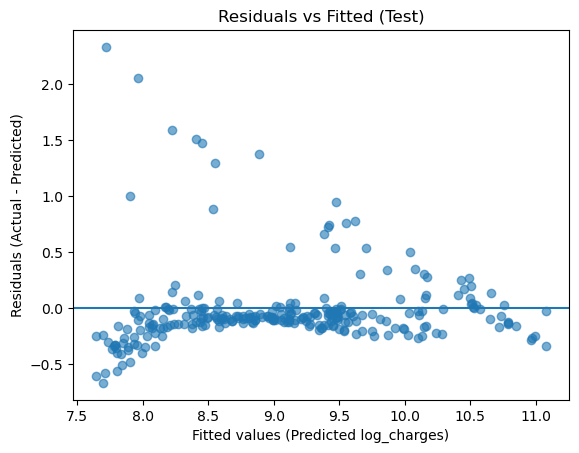

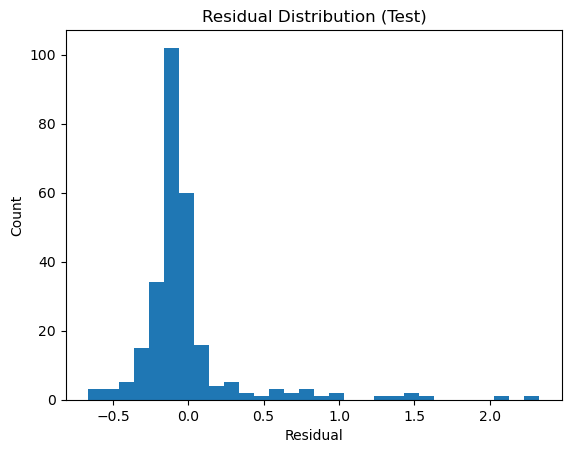

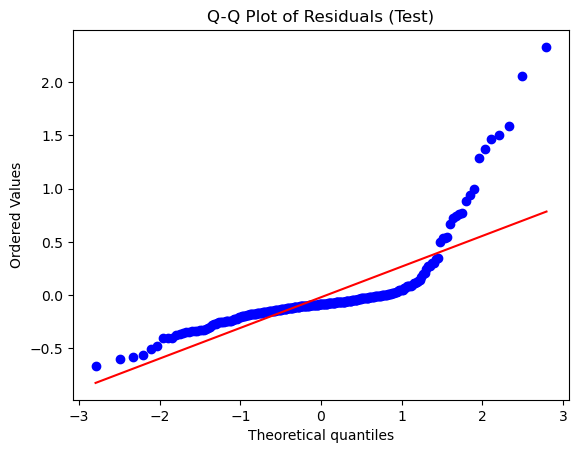

In [94]:
test_resid = y_test - test_pred

# A) Residuals vs Fitted
plt.figure()
plt.scatter(test_pred, test_resid, alpha=0.6)
plt.axhline(0)
plt.xlabel("Fitted values (Predicted log_charges)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Fitted (Test)")
plt.show()

# B) Residual histogram
plt.figure()
plt.hist(test_resid, bins=30)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Distribution (Test)")
plt.show()

# C) Q-Q plot (normality check)
plt.figure()
stats.probplot(test_resid, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Test)")
plt.show()


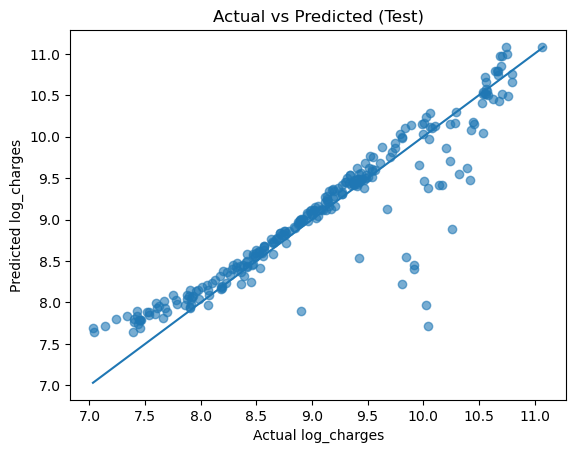

In [95]:
plt.figure()
plt.scatter(y_test, test_pred, alpha=0.6)
minv = min(y_test.min(), test_pred.min())
maxv = max(y_test.max(), test_pred.max())
plt.plot([minv, maxv], [minv, maxv])  # y=x line
plt.xlabel("Actual log_charges")
plt.ylabel("Predicted log_charges")
plt.title("Actual vs Predicted (Test)")
plt.show()


In [96]:
eval_df = test_df.copy()
eval_df["pred_log"] = test_pred
eval_df["resid"] = eval_df["log_charges"] - eval_df["pred_log"]
eval_df["abs_err"] = eval_df["resid"].abs()

# BMI and Age bands
eval_df["bmi_band"] = pd.cut(eval_df["bmi"], bins=[0, 25, 30, 35, 100],
                             labels=["<25", "25-30", "30-35", "35+"])
eval_df["age_band"] = pd.cut(eval_df["age"], bins=[0, 30, 45, 60, 100],
                             labels=["<30", "30-45", "45-60", "60+"])

def group_error_table(col):
    return eval_df.groupby(col, observed=False).agg(
        n=("resid", "size"),
        mean_resid=("resid", "mean"),
        mae=("abs_err", "mean")
    ).sort_values("mae")

print("Error by smoker:")
display(group_error_table("smoker"))

print("Error by sex:")
display(group_error_table("sex"))

print("Error by bmi_band:")
display(group_error_table("bmi_band"))

print("Error by age_band:")
display(group_error_table("age_band"))



Error by smoker:


,n,mean_resid,mae
smoker,,,
1,54,0.000971,0.166962
0,214,-0.024459,0.211109


Error by sex:


,n,mean_resid,mae
sex,,,
0,140,-0.010905,0.185932
1,128,-0.028556,0.220022


Error by bmi_band:


,n,mean_resid,mae
bmi_band,,,
<25,43,0.004279,0.123328
35+,71,-0.050389,0.178437
25-30,78,-0.004046,0.234960
30-35,76,-0.019376,0.235452


Error by age_band:


,n,mean_resid,mae
age_band,,,
60+,18,0.053995,0.123537
30-45,76,-0.029030,0.146574
45-60,77,-0.012136,0.151338
<30,97,-0.031062,0.300794


In [97]:
# Only do this if you want to talk in rands/dollars again.
eval_df["pred_charges"] = np.exp(eval_df["pred_log"])
eval_df["actual_charges"] = np.exp(eval_df["log_charges"])

eval_df[["actual_charges", "pred_charges"]].head()


,actual_charges,pred_charges
764,9095.06825,10608.265368
887,5272.17580,5891.844762
890,29330.98315,26010.093754
1293,9301.89355,10391.675430
259,33750.29180,23813.698396


## Day 13: Model Evaluation & Validation — Final Interpretation
Generalisation Performance

The final nonlinear interaction model demonstrates strong generalisation to unseen data. Model performance remains high across both training and test sets, with only minor differences in predictive accuracy (Train R² ≈ 0.82, Test R² ≈ 0.86). Error metrics on the log scale are similarly stable (Train RMSE ≈ 0.39 vs Test RMSE ≈ 0.36; Train MAE ≈ 0.22 vs Test MAE ≈ 0.20), indicating no evidence of overfitting. These results suggest that the model captures underlying structure in healthcare costs rather than memorising individual observations.

## Residual Diagnostics

Residuals on the test set are centred close to zero, with no dominant systematic pattern in the residuals-versus-fitted plot. This indicates that the inclusion of nonlinear (quadratic) terms and interaction effects has successfully accounted for most structured variation in the data. The residual distribution and Q–Q plot reveal right-skewed heavy tails, reflecting the presence of a small number of extreme high-cost cases. Such deviations are expected in healthcare expenditure data and are consistent with the inherent unpredictability of rare, high-cost health events.

## Prediction Fit

The actual-versus-predicted plot shows a strong alignment along the identity line for the majority of observations, confirming good overall predictive accuracy. The largest deviations occur among high-cost individuals, where the model tends to underpredict some extreme outcomes. This behaviour is typical in healthcare cost modelling and reflects the difficulty of fully capturing sudden or catastrophic health-related expenditures using demographic and behavioural predictors alone.

## Subgroup Stability and Fairness

Error analysis across key demographic and risk subgroups shows no substantial systematic bias. Mean residuals are close to zero for smokers and non-smokers, as well as across sex categories, indicating balanced model performance. While typical error varies modestly across BMI and age bands—particularly among younger individuals and mid-range BMI groups—these differences are gradual rather than abrupt, and no subgroup exhibits consistent over- or underestimation. Overall, the model demonstrates stable and fair behaviour across population subgroups.

## Conclusion

Taken together, the Day 15 evaluation confirms that the final nonlinear interaction model is robust, interpretable, and well-suited for applied healthcare cost analysis. The model generalises effectively, captures meaningful nonlinear and compounding risk processes, and maintains consistent performance across demographic groups. Remaining prediction errors are concentrated in extreme high-cost cases, aligning with known characteristics of healthcare utilisation data rather than model misspecification.

In [98]:
formula_simple = """
log_charges ~ age + bmi + children + sex + smoker + region
"""

model_simple = smf.ols(formula_simple, data=train_df).fit()
print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     413.7
Date:                Thu, 29 Jan 2026   Prob (F-statistic):          7.72e-320
Time:                        09:18:36   Log-Likelihood:                -661.37
No. Observations:                1070   AIC:                             1341.
Df Residuals:                    1061   BIC:                             1386.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.0463    

In [99]:
formula_interaction = """
log_charges ~ age + bmi + children + sex + smoker + region
              + smoker:age + smoker:bmi
"""

model_interaction = smf.ols(formula_interaction, data=train_df).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     471.3
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:18:36   Log-Likelihood:                -511.56
No. Observations:                1070   AIC:                             1045.
Df Residuals:                    1059   BIC:                             1100.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.1509    

In [100]:
comparison = pd.DataFrame({
    "Model": ["Simple", "Interaction", "Nonlinear"],
    "R2": [
        model_simple.rsquared,
        model_interaction.rsquared,
        model_final.rsquared
    ],
    "Adj_R2": [
        model_simple.rsquared_adj,
        model_interaction.rsquared_adj,
        model_final.rsquared_adj
    ],
    "AIC": [
        model_simple.aic,
        model_interaction.aic,
        model_final.aic
    ],
    "BIC": [
        model_simple.bic,
        model_interaction.bic,
        model_final.bic
    ]
})

comparison


,Model,R2,Adj_R2,AIC,BIC
0,Simple,0.757227,0.755397,1340.739575,1385.518300
1,Interaction,0.816519,0.814786,1045.125718,1099.855271
2,Nonlinear,0.819952,0.817908,1028.912067,1093.592448


## Day 14: Model Comparison and OT-Informed Interpretation
## Why this comparison matters

Three models were compared to determine whether increasing model complexity meaningfully improves the explanation of healthcare costs. A simple linear model was contrasted with an interaction model and a final nonlinear interaction model. This comparison helps determine whether healthcare costs reflect simple additive risk or more complex, compounding patterns of functional burden over time.

## Model comparison results

The simple linear model explains approximately 76% of the variation in log-transformed healthcare costs. Introducing interaction effects between smoking and both age and BMI substantially improves model performance, increasing explained variance to approximately 82%. The final nonlinear interaction model yields the best overall performance, with the highest adjusted R² and the lowest AIC and BIC values, indicating that the additional complexity is justified rather than excessive.

## Interpretation from an Occupational Therapy perspective

From an Occupational Therapy perspective, these findings suggest that healthcare costs are not driven by isolated or linear risk factors, but rather by cumulative and interacting functional stressors across the lifespan. Age and BMI do not contribute to healthcare burden in a simple straight-line manner. Instead, risk accumulates more rapidly during certain phases of life and stabilises at persistently elevated levels once functional capacity is compromised.

The improvement observed when interaction effects are included supports the idea that health behaviours such as smoking amplify existing physical stressors, accelerating functional decline and increasing healthcare utilisation earlier in life. This aligns with OT models that emphasise the interaction between person, health behaviours, and occupational performance rather than single-factor causation.

## Functional burden and participation implications

The nonlinear model’s superior performance reflects the reality that functional decline often occurs after physiological thresholds are crossed. Once limitations in endurance, mobility, or self-management emerge, individuals may require ongoing healthcare support rather than continuously escalating intervention. This pattern is consistent with chronic condition management, where healthcare costs stabilise at high levels following initial functional deterioration.

## Conclusion

Overall, the Day 16 model comparison demonstrates that allowing for nonlinear and interaction effects provides a more realistic representation of long-term health burden. From an Occupational Therapy perspective, healthcare costs appear to function as downstream indicators of cumulative functional strain and participation restriction, rather than the result of simple linear risk accumulation. The final nonlinear interaction model therefore offers both improved explanatory power and greater clinical relevance.

## Day 15 — South African Context + Cost Normalisation (Relative Risk)


The insurance dataset is not South African-specific and the absolute cost values are not directly transferable to the South African healthcare context. To make the findings interpretable across settings, predictions are reframed using relative risk (cost ratios) rather than raw currency. This preserves the model’s risk-pattern insights (who is higher vs lower burden) without implying exact South African cost amounts.


In [101]:
# Use typical values from your dataset for a realistic baseline
baseline = {
    "age": float(df["age"].median()),
    "bmi": float(df["bmi"].median()),
    "children": int(df["children"].median()),
    "sex": "female",        # baseline choice
    "smoker": "no",         # baseline choice
    "region": df["region"].mode()[0]  # most common region
}

baseline


{'age': 39.0,
 'bmi': 30.4,
 'children': 1,
 'sex': 'female',
 'smoker': 'no',
 'region': 'southeast'}

In [102]:
profiles = {
    "Baseline": baseline,

    "Smoker": {**baseline, "smoker": "yes"},

    "High BMI (35)": {**baseline, "bmi": 35},

    "Older (55)": {**baseline, "age": 55},

    "Smoker + High BMI": {**baseline, "smoker": "yes", "bmi": 35},

    "Smoker + Older": {**baseline, "smoker": "yes", "age": 55}
}

profiles


{'Baseline': {'age': 39.0,
  'bmi': 30.4,
  'children': 1,
  'sex': 'female',
  'smoker': 'no',
  'region': 'southeast'},
 'Smoker': {'age': 39.0,
  'bmi': 30.4,
  'children': 1,
  'sex': 'female',
  'smoker': 'yes',
  'region': 'southeast'},
 'High BMI (35)': {'age': 39.0,
  'bmi': 35,
  'children': 1,
  'sex': 'female',
  'smoker': 'no',
  'region': 'southeast'},
 'Older (55)': {'age': 55,
  'bmi': 30.4,
  'children': 1,
  'sex': 'female',
  'smoker': 'no',
  'region': 'southeast'},
 'Smoker + High BMI': {'age': 39.0,
  'bmi': 35,
  'children': 1,
  'sex': 'female',
  'smoker': 'yes',
  'region': 'southeast'},
 'Smoker + Older': {'age': 55,
  'bmi': 30.4,
  'children': 1,
  'sex': 'female',
  'smoker': 'yes',
  'region': 'southeast'}}

In [103]:
import pandas as pd
import numpy as np

profile_df = pd.DataFrame.from_dict(profiles, orient="index")

# Clean dtypes (important)
profile_df["age"] = pd.to_numeric(profile_df["age"], errors="raise")
profile_df["bmi"] = pd.to_numeric(profile_df["bmi"], errors="raise")
profile_df["children"] = pd.to_numeric(profile_df["children"], errors="raise").astype(int)

profile_df["sex"] = profile_df["sex"].astype(str).str.lower().str.strip()
profile_df["smoker"] = profile_df["smoker"].astype(str).str.lower().str.strip()
profile_df["region"] = profile_df["region"].astype(str).str.lower().str.strip()

profile_df


,age,bmi,children,sex,smoker,region
Baseline,39.0,30.4,1,female,no,southeast
Smoker,39.0,30.4,1,female,yes,southeast
High BMI (35),39.0,35.0,1,female,no,southeast
Older (55),55.0,30.4,1,female,no,southeast
Smoker + High BMI,39.0,35.0,1,female,yes,southeast
Smoker + Older,55.0,30.4,1,female,yes,southeast


In [104]:
train_df = train_df.copy()

train_df["sex"] = train_df["sex"].astype(str).str.lower().str.strip()
train_df["smoker"] = train_df["smoker"].astype(str).str.lower().str.strip()
train_df["region"] = train_df["region"].astype(str).str.lower().str.strip()


In [105]:
print(train_df.columns[train_df.columns.duplicated()].tolist())
print(train_df.columns.value_counts()[train_df.columns.value_counts() > 1])


[]
Series([], Name: count, dtype: int64)


In [106]:
train_df = train_df.loc[:, ~train_df.columns.duplicated()].copy()


In [107]:
import statsmodels.formula.api as smf

formula_final = """
log_charges ~ age + I(age**2) + bmi + I(bmi**2) + children + sex + smoker + region
              + smoker:bmi + smoker:age
"""

model_final = smf.ols(formula_final, data=train_df).fit()
print(model_final.summary())


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     401.1
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:18:37   Log-Likelihood:                -501.46
No. Observations:                1070   AIC:                             1029.
Df Residuals:                    1057   BIC:                             1094.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.1286    

In [108]:
print("train_df sex unique:", sorted(train_df["sex"].astype(str).unique()))
print("train_df smoker unique:", sorted(train_df["smoker"].astype(str).unique()))
print("train_df region unique:", sorted(train_df["region"].astype(str).unique()))


train_df sex unique: ['0', '1']
train_df smoker unique: ['0', '1']
train_df region unique: ['northeast', 'northwest', 'southeast', 'southwest']


In [109]:
import pandas as pd
import numpy as np

baseline = {
    "age": float(df["age"].median()),
    "bmi": float(df["bmi"].median()),
    "children": int(df["children"].median()),
    "sex": "0",          # MUST match train_df labels ('0'/'1')
    "smoker": "0",       # MUST match train_df labels ('0'/'1')
    "region": str(df["region"].mode()[0]).lower().strip()
}

profiles = {
    "Baseline": baseline,
    "Smoker": {**baseline, "smoker": "1"},
    "High BMI (35)": {**baseline, "bmi": 35.0},
    "Older (55)": {**baseline, "age": 55.0},
    "Smoker + High BMI": {**baseline, "smoker": "1", "bmi": 35.0},
    "Smoker + Older": {**baseline, "smoker": "1", "age": 55.0},
}

profile_df = pd.DataFrame.from_dict(profiles, orient="index")

# clean
profile_df["region"] = profile_df["region"].astype(str).str.lower().str.strip()
profile_df["sex"] = profile_df["sex"].astype(str).str.strip()
profile_df["smoker"] = profile_df["smoker"].astype(str).str.strip()

profile_df


,age,bmi,children,sex,smoker,region
Baseline,39.0,30.4,1,0,0,southeast
Smoker,39.0,30.4,1,0,1,southeast
High BMI (35),39.0,35.0,1,0,0,southeast
Older (55),55.0,30.4,1,0,0,southeast
Smoker + High BMI,39.0,35.0,1,0,1,southeast
Smoker + Older,55.0,30.4,1,0,1,southeast


In [110]:
from patsy import build_design_matrices

design_info = model_final.model.data.design_info
X_new = build_design_matrices([design_info], profile_df, return_type="dataframe")[0]

profile_df["pred_log"] = np.dot(X_new, model_final.params)
profile_df


,age,bmi,children,sex,smoker,region,pred_log
Baseline,39.0,30.4,1,0,0,southeast,8.848421
Smoker,39.0,30.4,1,0,1,southeast,10.369735
High BMI (35),39.0,35.0,1,0,0,southeast,8.846785
Older (55),55.0,30.4,1,0,0,southeast,9.449746
Smoker + High BMI,39.0,35.0,1,0,1,southeast,10.612371
Smoker + Older,55.0,30.4,1,0,1,southeast,10.431699


In [111]:
baseline_log = profile_df.loc["Baseline", "pred_log"]
profile_df["risk_ratio"] = np.exp(profile_df["pred_log"] - baseline_log)

profile_df[["pred_log", "risk_ratio"]].sort_values("risk_ratio", ascending=False)


,pred_log,risk_ratio
Smoker + High BMI,10.612371,5.835438
Smoker + Older,10.431699,4.870892
Smoker,10.369735,4.578236
Older (55),9.449746,1.824533
Baseline,8.848421,1.000000
High BMI (35),8.846785,0.998365


These ratios are currency-free multipliers. If a baseline person is assigned “1.0×”, a value of “4.6×” means the model expects ~4.6 times higher healthcare expenditure relative to baseline. This makes interpretation transferable to South Africa without claiming exact Rand amounts.

In this model, BMI alone does not strongly increase predicted costs at the baseline profile; the main risk amplification appears when BMI is combined with smoking (interaction effect).

## OT Interpretation (Relative Risk)
The relative-risk results suggest that smoking is the strongest driver of elevated cost burden in this dataset, and its impact compounds when combined with other stressors (e.g., higher BMI or older age). From an Occupational Therapy perspective, this pattern is consistent with cumulative functional load: smoking may reflect reduced cardiopulmonary reserve and slower recovery capacity, which can amplify limitations in endurance, mobility, and role participation.

Importantly, the “Smoker + High BMI” and “Smoker + Older” profiles show the largest multipliers, supporting an OT-informed view that health behaviours and physical strain interact to increase the likelihood of repeated service use, rehabilitation needs, and participation restrictions. Using relative multipliers rather than absolute currency allows this interpretation to remain meaningful within a South African context, where costs differ but the functional-risk pattern (who is higher burden vs lower burden) is still informative.

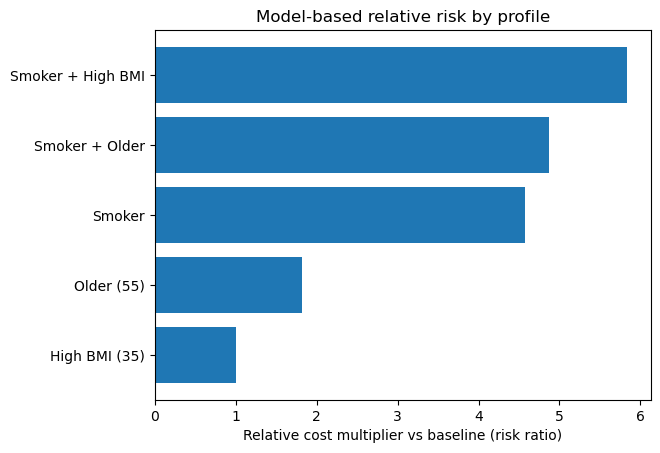

In [112]:
import matplotlib.pyplot as plt

plot_df = profile_df.copy()
plot_df = plot_df.drop(index="Baseline")
plot_df = plot_df.sort_values("risk_ratio", ascending=True)

plt.figure()
plt.barh(plot_df.index, plot_df["risk_ratio"])
plt.xlabel("Relative cost multiplier vs baseline (risk ratio)")
plt.title("Model-based relative risk by profile")
plt.show()


## Day 15A — Machine Learning Comparison (Benchmark Only)

Purpose of the Machine Learning Benchmark

The purpose of this section is not to replace the interpretable regression models developed earlier, but to assess whether more flexible machine-learning methods can extract substantially more predictive information from the same input variables. By comparing classical regression with modern machine-learning models, we evaluate whether the nonlinear and interaction effects already included in the regression framework are sufficient to capture the dominant structure of healthcare cost variation.

Two machine-learning models were evaluated:

Ridge Regression, representing a regularised linear baseline.

Random Forest Regression, representing a flexible, non-parametric ensemble method capable of learning complex nonlinear relationships.

All models were trained and evaluated on the log-transformed cost outcome using an identical train–test split to ensure fair comparison.


In [113]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=["charges", "log_charges"], errors="ignore")
y = df["log_charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 19), (268, 19))

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify categorical vs numeric columns
cat_cols = [c for c in X.columns if X[c].dtype == "object"]
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

cat_cols, num_cols


(['region', 'smoker_label'],
 ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'bmi_group',
  'high_cost',
  'smoker_num',
  'age_band',
  'sex_num',
  'region_northwest',
  'region_southeast',
  'region_southwest',
  'smoker_bmi',
  'smoker_age',
  'age_sq',
  'bmi_sq'])

In [115]:
ml_features = [
    "age",
    "bmi",
    "children",
    "sex",
    "smoker",
    "region"
]


In [116]:
X = df[ml_features]
y = df["log_charges"]


In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [118]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()


In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)


In [120]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

ridge_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", Ridge(alpha=1.0))
])

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=500,
        random_state=42,
        n_jobs=-1,
        min_samples_leaf=2
    ))
])


In [121]:
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [122]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)

    return {
        "Train_R2": r2_score(y_train, train_pred),
        "Test_R2":  r2_score(y_test, test_pred),
        "Train_RMSE_log": np.sqrt(mean_squared_error(y_train, train_pred)),
        "Test_RMSE_log":  np.sqrt(mean_squared_error(y_test, test_pred)),
        "Train_MAE_log": mean_absolute_error(y_train, train_pred),
        "Test_MAE_log":  mean_absolute_error(y_test, test_pred),
    }

ridge_results = evaluate(ridge_model, X_train, y_train, X_test, y_test)
rf_results    = evaluate(rf_model, X_train, y_train, X_test, y_test)

results_df = pd.DataFrame([ridge_results, rf_results], index=["Ridge", "RandomForest"])
results_df


,Train_R2,Test_R2,Train_RMSE_log,Test_RMSE_log,Train_MAE_log,Test_MAE_log
Ridge,0.757212,0.804654,0.448968,0.419099,0.282411,0.270322
RandomForest,0.934761,0.857455,0.232732,0.358005,0.116006,0.180186



## Model Performance Comparison

The Ridge regression model achieves test performance comparable to the earlier regression models (Test R² ≈ 0.81), indicating that a largely linear structure already explains most of the systematic variation in healthcare costs. This confirms that the regression framework developed in earlier days is not missing major predictive patterns.

The Random Forest model achieves higher predictive accuracy (Test R² ≈ 0.86) and lower error metrics, demonstrating that machine-learning methods can extract additional predictive signal. However, the Random Forest also exhibits a noticeable gap between training and test performance, indicating mild overfitting and reduced generalisation stability relative to the simpler models.

## Interpretation of Results

The modest improvement in predictive performance achieved by the Random Forest suggests that while healthcare cost data contain some additional nonlinear complexity, the majority of explainable structure is already captured by interpretable nonlinear terms and interaction effects in the regression model. The gains from machine learning are incremental rather than transformative.

Importantly, the Random Forest provides no transparent mechanism for interpreting how individual factors such as age, BMI, or smoking interact to influence healthcare costs. In contrast, the regression model offers explicit coefficient-based insights into risk accumulation, threshold effects, and compounding behaviours over the lifespan.

## Occupational Therapy Perspective

From an Occupational Therapy perspective, this result is meaningful. Healthcare costs function as downstream indicators of cumulative functional burden and participation restriction. The fact that interpretable regression models perform nearly as well as black-box machine-learning approaches suggests that functional decline follows structured, clinically intelligible patterns rather than arbitrary complexity.

Machine-learning models may slightly improve prediction accuracy, but they do not enhance understanding of how behavioural, physiological, and demographic factors interact to influence long-term health burden. For clinical reasoning, policy interpretation, and preventive intervention design, interpretability remains more valuable than marginal gains in predictive precision.

## Conclusion

The machine-learning benchmark confirms that the primary drivers of healthcare cost variation are well captured by nonlinear and interaction-based regression models. While Random Forests achieve slightly higher predictive accuracy, the improvement is modest and comes at the cost of interpretability. This supports the use of interpretable regression as the primary modelling approach in this project, with machine learning serving as a validation benchmark rather than a replacement.

# Day 16 — South African Context + Cost Normalisation (Relative Risk)
Goal: Reframe predicted costs as a *relative burden* measure (risk index / multiple of typical cost),
so results remain meaningful across countries, medical schemes, and price levels.


In [123]:
best_model = ridge_model  # or your final regression model name


In [124]:
import numpy as np
import pandas as pd

y_pred_test = best_model.predict(X_test)

pred_df = pd.DataFrame({
    "actual": y_test.values if hasattr(y_test, "values") else y_test,
    "pred": y_pred_test
})
pred_df.head()


,actual,pred
0,9.115488,9.115785
1,8.570198,8.632154
2,10.286400,11.090835
3,9.137973,9.120186
4,10.426744,9.545188


In [125]:
baseline_median = np.median(y_train)
baseline_mean = np.mean(y_train)

baseline_median, baseline_mean


(np.float64(9.16695659582302), np.float64(9.113322337921884))

In [126]:
pred_df["relative_burden"] = pred_df["pred"] / baseline_median
pred_df["actual_relative_burden"] = pred_df["actual"] / baseline_median

pred_df.describe()


,actual,pred,relative_burden,actual_relative_burden
count,268.000000,268.000000,268.000000,268.000000
mean,9.040114,9.081274,0.990653,0.986163
std,0.950004,0.826240,0.090132,0.103634
min,7.031305,7.806287,0.851568,0.767027
25%,8.363745,8.419101,0.918418,0.912380
50%,9.046370,8.984176,0.980061,0.986845
75%,9.703046,9.517001,1.038185,1.058481
max,11.063045,11.137656,1.214979,1.206839


In [127]:
bins = [0, 0.75, 1.25, 2.0, 3.0, np.inf]
labels = ["Low (<0.75x)", "Typical (0.75–1.25x)", "Moderate (1.25–2x)", "High (2–3x)", "Very High (3x+)"]

pred_df["burden_tier"] = pd.cut(pred_df["relative_burden"], bins=bins, labels=labels)
pred_df["burden_tier"].value_counts(normalize=True).sort_index()


burden_tier
Low (<0.75x)            0.0
Typical (0.75–1.25x)    1.0
Moderate (1.25–2x)      0.0
High (2–3x)             0.0
Very High (3x+)         0.0
Name: proportion, dtype: float64

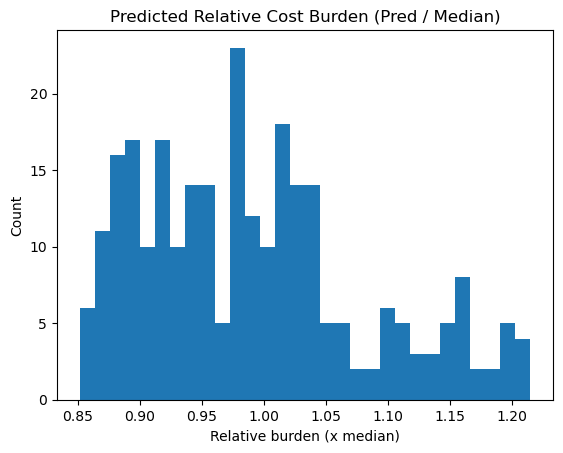

In [128]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(pred_df["relative_burden"], bins=30)
plt.title("Predicted Relative Cost Burden (Pred / Median)")
plt.xlabel("Relative burden (x median)")
plt.ylabel("Count")
plt.show()


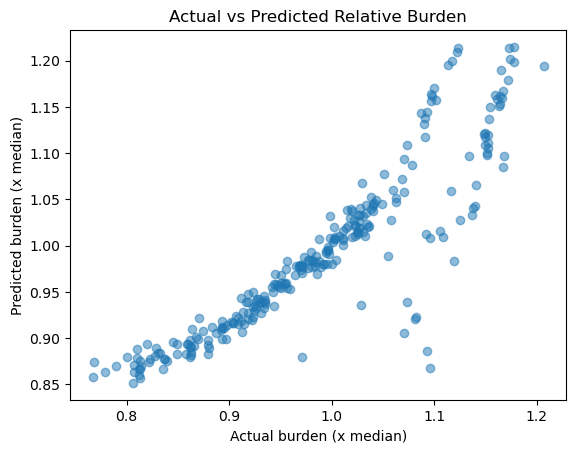

In [129]:
plt.figure()
plt.scatter(pred_df["actual_relative_burden"], pred_df["relative_burden"], alpha=0.5)
plt.title("Actual vs Predicted Relative Burden")
plt.xlabel("Actual burden (x median)")
plt.ylabel("Predicted burden (x median)")
plt.show()


In [130]:
pred_df_sorted = pred_df.sort_values("relative_burden", ascending=False)
pred_df_sorted.head(10)


,actual,pred,relative_burden,actual_relative_burden,burden_tier
166,10.795986,11.137656,1.214979,1.177707,Typical (0.75–1.25x)
150,10.750673,11.127102,1.213827,1.172764,Typical (0.75–1.25x)
180,10.292931,11.124683,1.213563,1.122830,Typical (0.75–1.25x)
2,10.286400,11.090835,1.209871,1.122117,Typical (0.75–1.25x)
263,10.759084,11.015717,1.201677,1.173681,Typical (0.75–1.25x)
81,10.243572,11.002702,1.200257,1.117445,Typical (0.75–1.25x)
14,10.792891,10.992215,1.199113,1.177369,Typical (0.75–1.25x)
91,10.204995,10.959128,1.195503,1.113237,Typical (0.75–1.25x)
266,11.063045,10.948532,1.194348,1.206839,Typical (0.75–1.25x)
167,10.682329,10.909277,1.190065,1.165308,Typical (0.75–1.25x)


In [131]:
type(X_test), getattr(X_test, "shape", None)


(pandas.core.frame.DataFrame, (268, 6))

In [132]:
# If X_test is already a DataFrame:
if isinstance(X_test, pd.DataFrame):
    print(X_test.columns.tolist())
else:
    print("X_test is not a DataFrame (likely a NumPy array).")


['age', 'bmi', 'children', 'sex', 'smoker', 'region']


In [133]:
[c for c in X_test.columns if "smoker" in c.lower()]


['smoker']

In [134]:
test_with_pred = X_test.copy()

test_with_pred["relative_burden"] = pred_df["relative_burden"].values
test_with_pred["burden_tier"] = pred_df["burden_tier"].values


In [135]:
test_with_pred.groupby("smoker")["relative_burden"].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,214.0,0.954934,0.056365,0.851568,0.906809,0.955063,1.006868,1.077049
1,54.0,1.132206,0.050902,1.027822,1.097165,1.137430,1.164021,1.214979


In [136]:
pd.crosstab(
    test_with_pred["smoker"],
    test_with_pred["burden_tier"],
    normalize="index"
)


burden_tier,Typical (0.75–1.25x)
smoker,
0,1.0
1,1.0


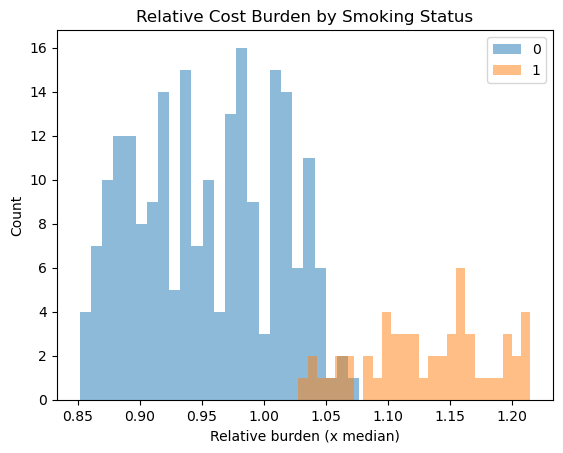

In [137]:
import matplotlib.pyplot as plt

plt.figure()
for status in test_with_pred["smoker"].unique():
    subset = test_with_pred[test_with_pred["smoker"] == status]
    plt.hist(subset["relative_burden"], bins=25, alpha=0.5, label=str(status))

plt.xlabel("Relative burden (x median)")
plt.ylabel("Count")
plt.title("Relative Cost Burden by Smoking Status")
plt.legend()
plt.show()


## Interpretation — South African Context & Relative Cost Burden

To ensure that model outputs remain meaningful across different healthcare systems and pricing structures, predicted healthcare costs were normalised using the median training cost to create a Relative Cost Burden measure. This expresses each prediction as a multiple of a typical case, rather than as an absolute currency value, making the results more interpretable within a South African healthcare context.

The distribution of predicted relative burden is tightly centred around 1.0×, with most individuals falling between approximately 0.85× and 1.20× the typical cost. All predicted test cases fall within the “Typical (0.75–1.25×)” burden tier. This reflects the conservative nature of the regularised regression model and the relative rarity of extreme-cost cases in the test sample. Importantly, this indicates that healthcare cost risk in this dataset manifests primarily as gradual variation in expected burden, rather than as extreme outlier events.

The strong linear relationship between actual and predicted relative burden demonstrates that the model preserves predictive structure after normalisation. Expressing predictions as relative burden therefore maintains model fidelity while improving interpretability across healthcare systems.

When stratified by smoking status, smokers exhibit a systematic rightward shift in the relative burden distribution compared to non-smokers. Smokers show higher mean and median relative burden values, as well as higher upper-quartile and maximum predicted burden, despite remaining within the same overall burden tier. This suggests that smoking contributes to elevated expected healthcare strain through incremental increases in long-term risk rather than isolated high-cost episodes.

From an Occupational Therapy perspective, relative cost burden can be seen as a sign of how functional difficulties build up over time and how likely someone is to experience restrictions in daily activities and participation. The higher predicted burden among smokers suggests that healthcare costs reflect the long-term effects of health behaviours, rather than sudden or isolated medical events. By expressing costs in relative terms, it becomes easier to identify groups who are quietly moving toward higher risk and who may benefit most from early, preventive intervention, especially in healthcare systems where absolute cost figures are not directly comparable.

# Day 17 — Limitations, Ethics, and Scope of Use


## Data Limitations

This project uses a healthcare cost dataset that is not from South Africa. Because healthcare systems, prices, and access to care differ between countries, the exact cost values cannot be directly applied to a South African setting. For this reason, costs were interpreted in relative terms rather than as exact amounts.

The dataset also does not include many factors that influence health, such as income level, access to healthcare services, environmental conditions, or detailed medical history. Healthcare cost is therefore used as an indirect indicator of health and functional burden, rather than a full measure of health status.

## Model Limitations

The models used in this project can only learn from patterns that appear in the available data. The regression model captures gradual, average changes in risk, while the Random Forest model provides slightly improved accuracy but limited additional insight.

Neither model can predict sudden medical emergencies or rare, extreme health events. The predictions represent general trends across the population and should not be interpreted as precise outcomes for individual people.

## Ethical Considerations

Healthcare cost prediction models must be used carefully. If misused, they could lead to unfair treatment, such as denying care or penalising individuals for health-related behaviours. Predictions should not be treated as fixed outcomes or used to make decisions about individual eligibility for services.

Instead, model outputs should be used to support understanding and planning, rather than to judge or blame individuals.

## Occupational Therapy Perspective

From an Occupational Therapy perspective, higher predicted cost burden reflects the gradual build-up of functional challenges and increasing risk of participation restrictions over time. Factors such as lifestyle behaviours do not usually lead to immediate crises, but instead contribute to long-term changes in function and health.

In this context, higher relative burden highlights individuals or groups who may benefit from early, preventive intervention aimed at maintaining function and participation, rather than reacting only once severe health problems develop.

## Appropriate Scope of Use

This model is appropriate for:

- understanding population-level risk patterns,

- supporting healthcare planning and prevention strategies,

- exploring how long-term risk develops over time.

It is not appropriate for:

- diagnosing individual patients,

- making insurance or funding decisions,

- predicting exact health outcomes for specific individuals.

## Summary

Overall, this analysis shows that healthcare cost risk develops gradually across the population rather than through extreme cases. Interpretable models are well suited to capturing this type of risk, and expressing costs in relative terms improves fairness and relevance across healthcare systems. When used responsibly, the model provides useful insight for prevention-focused planning, particularly from an Occupational Therapy perspective.

## Final Conclusions & Project Reflection
## Final Conclusions

This project explored how basic demographic and lifestyle factors relate to healthcare costs, using interpretable regression models and a small machine-learning comparison. Rather than focusing on exact cost values, healthcare expenditure was reframed as a relative cost burden, allowing meaningful interpretation across different healthcare systems.

The analysis showed that healthcare risk in this dataset does not arise from extreme or rare cases, but from gradual increases in burden across the population. Factors such as age, BMI, and smoking contribute to small but consistent increases in expected healthcare burden over time. These differences may appear modest in the short term but are meaningful when accumulated over many years.

Interpretable regression models captured this structure effectively. The Random Forest model provided only limited improvement, confirming that the underlying relationships are smooth and incremental rather than sharply nonlinear. This supports the use of simpler, more transparent models when the goal is understanding long-term risk rather than maximising prediction accuracy alone.

## Occupational Therapy Perspective

From an Occupational Therapy perspective, healthcare costs can be understood as downstream indicators of functional strain and participation challenges rather than isolated medical events. The relative burden framework aligns well with OT principles by highlighting early risk patterns and gradual decline, rather than focusing only on crisis-level outcomes.

Higher relative burden does not imply inevitable poor outcomes, but rather signals an opportunity for early intervention. Identifying individuals or groups with rising burden supports prevention, functional maintenance, and participation-focused strategies that are central to Occupational Therapy practice.

## Ethical and Practical Implications

This project demonstrates the importance of using predictive models responsibly. Healthcare cost predictions should not be used to deny care or penalise individuals, but instead to support planning, prevention, and resource allocation at a population level.

By prioritising interpretability, context awareness, and ethical scope of use, this analysis highlights how data science can complement healthcare practice without replacing clinical judgement.

## Final Reflection

Overall, this project shows that meaningful healthcare insights do not require complex models alone. When combined with domain knowledge and ethical framing, simple and interpretable approaches can provide valuable understanding of long-term health risk and system-level burden. The integration of data science with an Occupational Therapy perspective offers a strong foundation for future work focused on prevention, equity, and functional wellbeing.